#Jonathan Halverson
#Tuesday, February 23, 2016
# Coin Toss: Binomial versus Normal Approximation

###Here we return to the simple problem of asking what is the probability of getting 60 heads or more when flipping a fair coin 100 times. We compare the exact solution to that of the normal approximation. The exact solution is: 

In [51]:
from scipy.stats import binom
1.0 - binom.cdf(k=59, n=100, p=0.5)

0.028443966820490441

In [52]:
sum([binom.pmf(k, n=100, p=0.5) for k in range(60, 101)])

0.028443966820489341

###To make the normal approximation the mean is obviously 50 or np. The standard deviation is obtained by recognizing that each flip is a Bernoulli trial. Therefore, the standard deviation is $\sqrt{np(1-p)}$. 

In [53]:
mu = 50.0
s = (100 * 0.5 * (1 - 0.5))**0.5

###Compute the probability of being greater than or equal to 60 (following pg. 151 of OpenIntro we add 1/2 to the lower bound of the interval which leads to a better approximation): 

In [54]:
from scipy.stats import norm
1.0 - norm.cdf(59.5, loc=mu, scale=s)

0.028716559816001852

###Let's run the numerical experiment: 

In [55]:
from random import choice

trials = 10000
success = 0
data = []
heads_cutoff = 60
n = 100
for _ in xrange(trials):
    heads = 0
    for _ in xrange(n):
        if (choice(["heads", "tails"]) == "heads"):
            heads += 1
    if (heads >= heads_cutoff):
        success += 1
    data.append(heads)
print(float(success) / trials)

0.0291


###Below we plot the pmf and pdf of the two distributions and note the similarity:

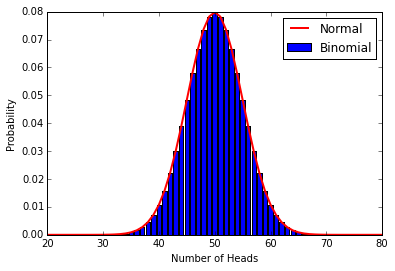

In [58]:
# binomial
x1 = range(0, 101)
y1 = binom.pmf(x1, n=100, p=0.5)
plt.bar(x1, y1, align='center', label='Binomial')

# normal
mu = 50.0
s = (100 * 0.5 * (1 - 0.5))**0.5
x = np.linspace(0, 100, num=101)
y = norm.pdf(x, loc=mu, scale=s)
lines = plt.plot(x, y, 'r-', lw=2, label='Normal')

plt.xlim(20, 80)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.legend()